# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. 
# The x-axis should be the number of simulations, and the y-axis should be the probability of winning. 
# (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)



def montyhall(number_of_repeats):
    x=[]
    ykeep=[]
    ychange=[]
    for i in range(number_of_repeats):
        # To do this, generate a random integer between one and three to represent the door hiding the car. 
        door_car=np.random.randint(1,4)

        # Then, generate a second integer between one and three representing the player's selection. 
        player_selec=np.random.randint(1,4)

        # Then, of those the contestant did not choose, select a door concealing a goat to reveal. 
        listo = [1,2,3]
        listo.remove(player_selec)
        if door_car != player_selec:
            listo.remove(door_car)
        listo = np.array(listo)
        door_goat_reveal = np.random.choice(listo)
        
        # Then, assuming the contestant choses to change his first choice, contestant second "choice" is: 
        listu = [1,2,3]
        listu.remove(player_selec)
        listu.remove(door_goat_reveal)
        player_selec_two = int(listu[0])
        
        # Record the results of the simulated game if they changed versus if they did not. 
        x.append(i+1)
        if door_car == player_selec:
            ykeep.append(1)
        else:
            ykeep.append(0)
        if door_car == player_selec_two: 
            ychange.append(1)    
        else:
            ychange.append(0)    
    # graph:
    # x = 1, 2, 3,4,5,6... n
    # ykeep   = prob of winning after x times if keeping 1st door choice 
    # ychange = prob of winning after x times if changing door choice 

    ykeepfr=(np.cumsum(ykeep))/x
    ychangefr=(np.cumsum(ychange))/x
    
    plt.figure(figsize=(8,5))
    plt.plot(x,ykeepfr,label = 'cumulative wins when always KEEPING original door choice',)
    plt.plot(x,ychangefr,label = 'cumulative wins when always CHANGING original door choice' )
    plt.legend()
    plt.show();
    
    i=+1
    
    return ykeepfr[number_of_repeats-1],ychangefr[number_of_repeats-1]




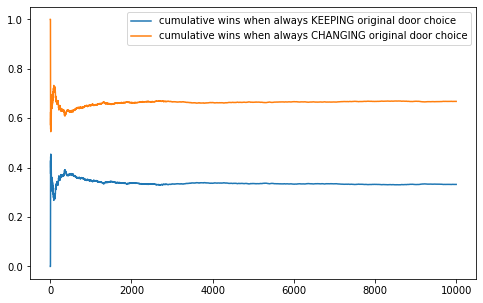

keep,change prob =  0.332 0.668


In [96]:
keep,change = player_selec_two=montyhall(10000)
print('keep,change prob = ', keep, change)

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 